In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import StandardScaler,  Imputer

import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from matplotlib import cm

# グラフをブラウザ内に表示
%matplotlib inline

In [3]:
# データ読み込み
train = pd.read_csv('../../kaggle/bnp_paribas/data/train.csv')

#train.drop(labels='ID', axis=1, inplace=True)

#len(train) #行数確認
#train.shape # 行数、列数

In [4]:
train.head()
# train[['target','v1',]].head()  # カラム指定

#train.isnull().sum()  #　列ごとに欠損値をカウントする

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [103]:
# カテゴリカル変数を指定
categorical = ['v3','v22','v24','v30','v31','v47','v52','v56','v66','v71','v74','v75','v79',
               'v91','v107','v110','v112','v113','v125']

# ID付きのカテゴリカル変数
categorical_id = ['ID', 'target']
categorical_id.extend(categorical)

#　量的変数
continuous = ['v1','v2','v4','v5','v6','v7','v8','v9','v10','v11','v12','v13','v14','v15','v16',
              'v17','v18','v19','v20','v21','v23','v25','v26','v27','v28','v29','v32','v33','v34',
              'v35','v36','v37','v38','v39','v40','v41','v42','v43','v44','v45','v46','v48','v49',
              'v50','v51','v53','v54','v55','v57','v58','v59','v60','v61','v62','v63','v64','v65',
              'v67','v68','v69','v70','v72','v73','v76','v77','v78','v80','v81','v82','v83','v84',
              'v85','v86','v87','v88','v89','v90','v92','v93','v94','v95','v96','v97','v98','v99',
              'v100','v101','v102','v103','v104','v105','v106','v108','v109','v111','v114',
              'v115','v116','v117','v118','v119','v120','v121','v122','v123','v124','v126',
              'v127','v128','v129','v130','v131']

In [104]:
#カテゴリカル変数のみピックアップ
train_cate = train[categorical_id]

In [106]:
train_cate.head()

,ID,target,v3,v22,v24,v30,v31,v47,v52,v56,...,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
0,3,1,C,XDX,C,C,A,C,G,DI,...,F,B,D,E,A,E,B,O,NaN,AU
1,4,1,C,GUV,C,C,A,E,G,DY,...,F,B,D,D,B,B,A,U,G,AF
2,5,1,C,FQ,E,NaN,A,C,F,AS,...,B,B,B,E,G,C,B,S,NaN,AE
3,6,1,C,ACUE,D,C,B,C,H,BW,...,F,B,D,B,B,B,B,J,NaN,CJ
4,8,1,C,HIT,E,NaN,A,I,H,NaN,...,F,B,D,C,G,C,A,T,G,Z


In [30]:
#欠損値の補正　カテゴリカル変数だけだから不要？
#imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
#imr = imr.fit(train[['v1', 'v2']])

In [108]:
# ランダムサンプリング
sampler = np.random.permutation(len(train_cate))
train_cate_1000 = train_cate.take(sampler[:1000])
train_cate_1000.head()

,ID,target,v3,v22,v24,v30,v31,v47,v52,v56,...,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
55574,111063,1,C,AEVL,D,NaN,A,I,G,DO,...,F,B,D,C,C,D,A,D,AD,U
111718,223524,1,C,GXB,D,NaN,A,C,D,DI,...,B,B,B,E,B,B,B,L,NaN,AA
19213,38477,0,C,ADPY,E,D,B,C,H,DI,...,F,B,D,B,E,F,B,P,NaN,H
54285,108479,1,C,AABB,E,C,A,I,C,BW,...,F,B,D,C,C,D,A,E,Q,AC
42333,84687,0,C,UIG,D,NaN,A,I,E,DO,...,B,B,B,C,G,C,A,D,W,CG


In [117]:
dummies = pd.get_dummies(train_cate_1000[categorical])
dummies.head()

,v3_A,v3_C,v22_AA,v22_AAAK,v22_AABB,v22_AABI,v22_AABQ,v22_AAEA,v22_AAEF,v22_AAEG,...,v125_Q,v125_R,v125_S,v125_T,v125_U,v125_V,v125_W,v125_X,v125_Y,v125_Z
55574,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
111718,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19213,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54285,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
km = KMeans(
            n_clusters=  3,  # クラスタの個数
            init = 'k-means++', # セントロイドの初期値をランダムに選択
            n_init = 10, # 異なるセントロイドの初期値を用いたk-meansアルゴリズムの実行回数
            max_iter = 300, # 最大イテレーション回数
            #tol = 1e-04, # 収束と判定するための相対的な許容誤差
            random_state=0 # 
)

In [118]:
# クラスタ中心の計算と書くサンプリングのインデックスの予測
train_km = km.fit_predict(dummies)

In [133]:
km.inertia_

8750.1459523980939

In [140]:
# エルボー法で最適な個数を見つける
distortions = []
for i  in range (1, 11):
    km = KMeans(
            n_clusters=  i,  # クラスタの個数
            init = 'k-means++', # セントロイドの初期値をランダムに選択
            n_init = 10, # 異なるセントロイドの初期値を用いたk-meansアルゴリズムの実行回数
            max_iter = 500, # 最大イテレーション回数
            tol = 1e-04, # 収束と判定するために相対的な許容誤差（kmeans++では不要？？）
            random_state=0 # セントロイドの初期化に用いる乱数生成器の状態
    )
    
    km.fit(dummies)
    distortions.append(km.inertia_)

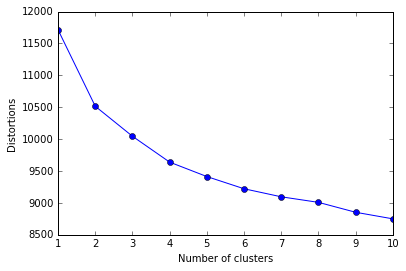

In [141]:
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.show()

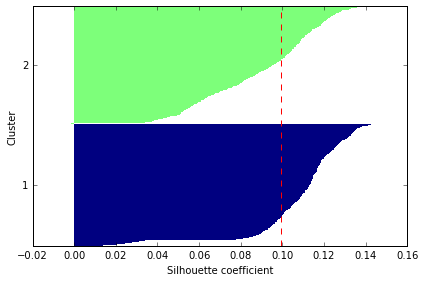

In [130]:
# シルエット図でクラスタリングの性能を数値化する
km = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            #tol=1e-04,
            random_state=0)

y_km = km.fit_predict(dummies)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(dummies, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300) # 画像保存
plt.show()

## 参考：

In [111]:
# IDとtargetと、ダミー変数を結合する
train_cate_dummies_all = pd.concat([train_cate_1000[['ID', 'target']], dummies ], axis=1)
train_cate_dummies_all.head()

#train_cate_100[['ID', 'target']]
#train_cate_dummies

,ID,target,v3_A,v3_C,v22_AA,v22_AAAK,v22_AABB,v22_AABI,v22_AABQ,v22_AAEA,...,v125_Q,v125_R,v125_S,v125_T,v125_U,v125_V,v125_W,v125_X,v125_Y,v125_Z
55574,111063,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
111718,223524,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19213,38477,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54285,108479,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42333,84687,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
km_df = pd.DataFrame(train_km)
km_df.columns = ['cluster']
km_df.head()

,cluster
0,0
1,0
2,0
3,1
4,0


In [97]:
train_cate_dummies_all['cluster'] = train_km
train_cate_dummies_all.head()

,ID,target,v3_A,v3_B,v3_C,v22_AAEF,v22_AAG,v22_AAGA,v22_AAGW,v22_AAGZ,...,v125_R,v125_S,v125_T,v125_U,v125_V,v125_W,v125_X,v125_Y,v125_Z,cluster
84245,168174,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
114206,228478,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
85252,170241,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
13619,27287,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
81745,163207,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [99]:
km.inertia_

491951782447.91162

In [79]:
# GROUP BY
groupby = train_cate.groupby('v3')
groupby[['ID']].count()

,ID
v3,
A,227
B,53
C,110584
